In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use("science")

In [49]:
phantom_length = 40 # cm
unit_length = phantom_length/1000 # cm
phantom_volume = np.pi * (15)**2 * (20)
unit_volume = phantom_volume/1000

p_water = 1 # gcm^-3
p_al = 2.7 # gcm^-3

Part A

In [44]:
doses = np.array([np.genfromtxt(f'./part_a/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)])

bragg_peaks = np.array([
    unit_length * np.argmax(doses, axis=1)
])

40 - np.mean(bragg_peaks), np.std(bragg_peaks)

(28.119999999999997, 0.06449806198638856)

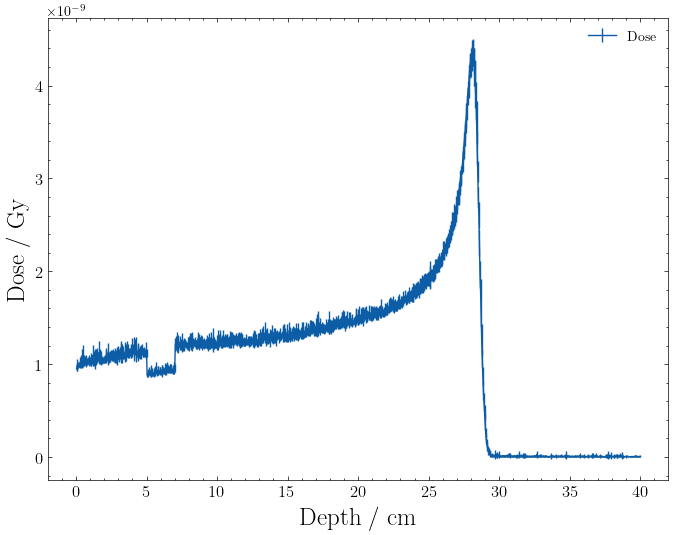

In [45]:
plt.figure(figsize=(8,6))

plt.errorbar(
    [40 - unit_length*i for i in range(1000)],
    np.mean(doses, axis=0),
    yerr=np.std(doses, axis=0),
    label="Dose"
)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Depth / cm", fontsize=18)
plt.ylabel("Dose / Gy", fontsize=18)
plt.legend()

plt.savefig("./plots/Dose_Depth_ex3_3.png", dpi=300)

In [87]:
# AL plate - 25 cm to 27 cm
# pos 
al_plate_pos = np.arange((25/40)*1000, (27/40)*1000 + 1, dtype=int)
not_plate = np.delete(np.arange(0, 1000, dtype=int), al_plate_pos)

In [110]:
dose = np.mean(doses, axis=0)
dose_unc = np.std(doses, axis=0)

stopping_powers_al = dose[al_plate_pos] * p_al * unit_volume / unit_length # J cm^-1
stopping_powers_al_unc = dose_unc[al_plate_pos] * p_al * unit_volume / unit_length # J cm^-1

1.2404064454906036e-06 1.9732862609967018e-08


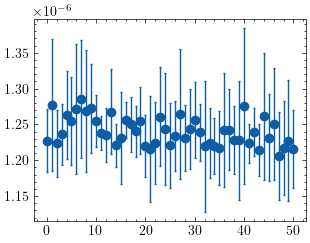

In [118]:
plt.figure(figsize=(8,6))

plt.errorbar(
    np.arange(0,51),
    stopping_powers_al,
    yerr=stopping_powers_al_unc,
    ls="none",
    marker="o",
    capsize=1
)
# Stopping power values

SP_mean = np.mean(stopping_powers_al)
SP_unc = np.std(stopping_powers_al)
print(SP_mean, SP_unc)

In [135]:
water_doses = np.mean([np.genfromtxt(f'../ex3_1/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)], axis=0)
water_doses_unc = np.std([np.genfromtxt(f'../ex3_1/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)], axis=0)

In [136]:
SP_water = water_doses[al_plate_pos] * p_water * unit_volume / unit_length
SP_water_unc = water_doses_unc[al_plate_pos] * p_water * unit_volume / unit_length

In [144]:
# SPR approximation
print(dose[-1], dose_unc[-1]) # Stopping power of water at start of beam
t_m = 1 #cm
WET = t_m * (p_al/p_water) * (SP_mean / SP_water)
print(f"The water equivalent thickness of the 1cm Al plate is: {WET} cm")

9.47327560840705e-10 2.3743646511195752e-11
The water equivalent thickness of the 1cm Al plate is: 10.002883500242127 cm


Part B

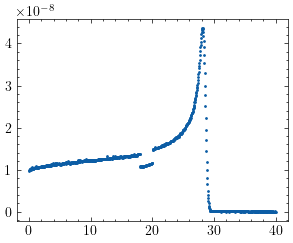

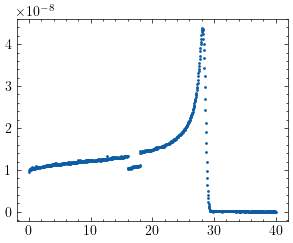

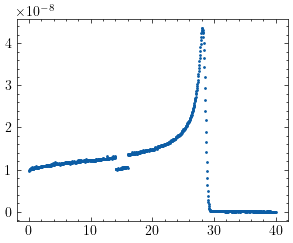

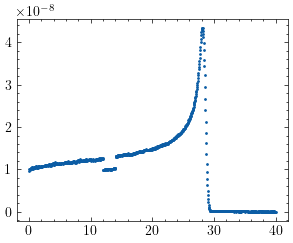

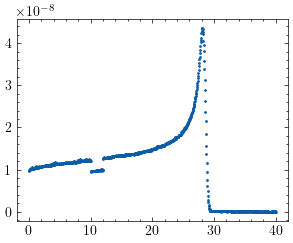

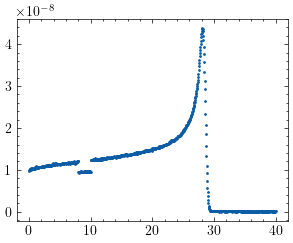

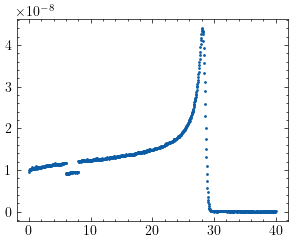

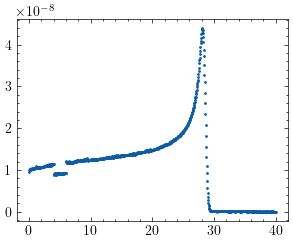

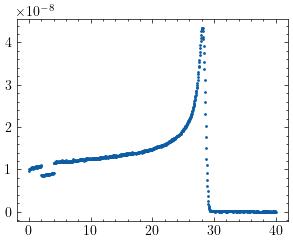

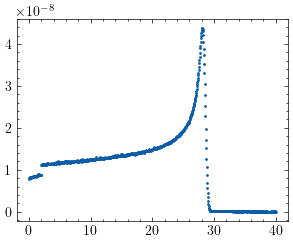

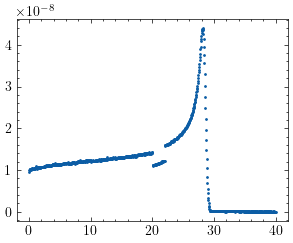

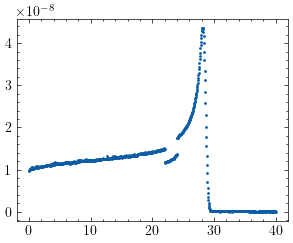

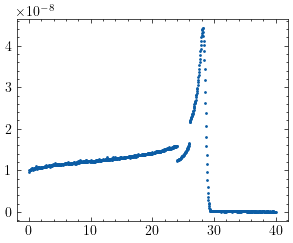

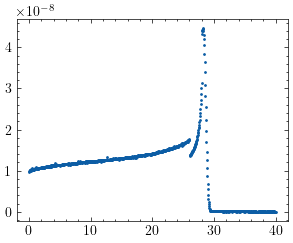

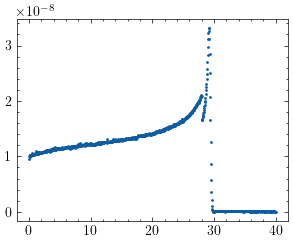

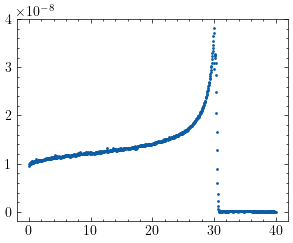

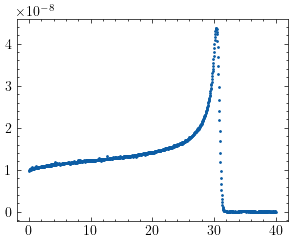

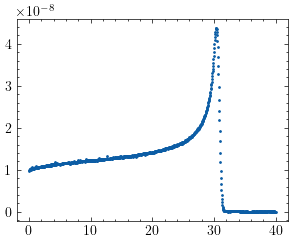

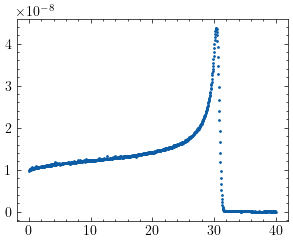

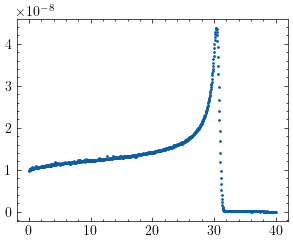

In [213]:
peaks = []
uncertainities = []

for pos in range(1, 20, 2):
    doses = np.array([np.genfromtxt(f'./part_b/outputs_pos{pos}/job{i}.csv', delimiter=',')[:, -1] for i in range(1,4)])

    bragg_peaks = np.array([
        unit_length * np.argmax(doses, axis=1)
    ])

    peaks.append(np.mean(bragg_peaks))
    uncertainities.append(np.std(bragg_peaks))
    plt.scatter(
        [40 - unit_length*i for i in range(1000)],
        np.mean(doses, axis=0),
        s=1
    )
    plt.show()

_peaks = []
_uncertainities = []
for pos in range(1, 20, 2):
    doses = np.array([np.genfromtxt(f'./part_b/outputs_pos_neg{pos}/job{i}.csv', delimiter=',')[:, -1] for i in range(1,4)])

    bragg_peaks = np.array([
        unit_length * np.argmax(doses, axis=1)
    ])
    
    _peaks.append(np.mean(bragg_peaks))
    _uncertainities.append(np.std(bragg_peaks))
    plt.scatter(
        [40 - unit_length*i for i in range(1000)],
        np.mean(doses, axis=0),
        s=1
    )
    plt.show()

peaks = 40 - np.array(peaks)
_peaks = 40 - np.array(_peaks)

In [210]:
from scipy.optimize import curve_fit
f = lambda x, m,c: m*x +c 

m, c = curve_fit(f, xdata=range(20, 1, -2),ydata=peaks,sigma=uncertainities)[0]

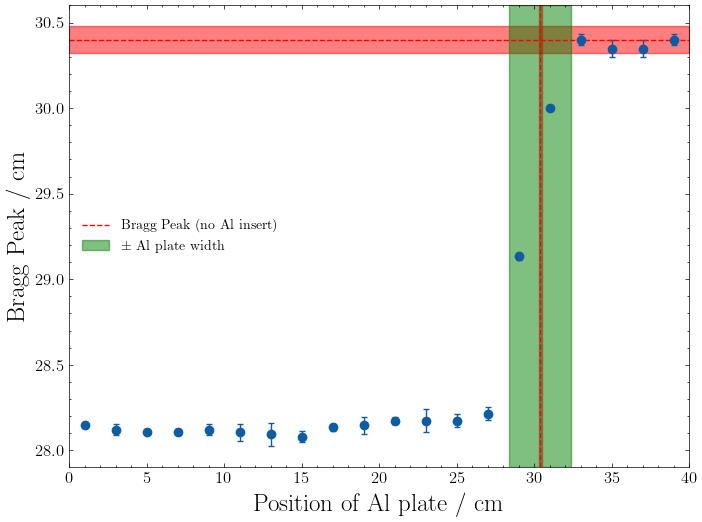

In [275]:
plt.figure(figsize=(8,6))

plt.errorbar(
    np.arange(19, 0, -2),
    peaks,
    yerr=uncertainities,
    capsize=2,
    marker="o",
    ls="none"
)
plt.errorbar(
    np.arange(21, 40, 2),
    _peaks,
    yerr=_uncertainities,
    capsize=2,
    marker="o",
    ls="none",
    c="#0C5DA5"
)
'''plt.plot(
    range(20, 1, -2),
    m*range(20, 1, -2) + c,
    c="red",
    ls="--",
    label=f"{round(m,3)} PP + {round(c,3)}"
)'''

plt.axhline(y = 30.4, ls="--", c="red")
plt.fill_between(x=np.arange(0,41), y1=30.32, y2 = 30.48, alpha=0.5, color="red")
plt.axvline(x = 30.4, ls="--", c="red", label="Bragg Peak (no Al insert)")
plt.axvspan(xmin=30.32, xmax = 30.48, alpha=0.5, color='red')
plt.axvspan(xmin=28.4, xmax = 32.4, alpha=0.5, color='green', label=r"$\pm$ Al plate width")

plt.xlim(0,40)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Position of Al plate / cm", fontsize=18)
plt.ylabel("Bragg Peak / cm", fontsize=18)
plt.legend(loc="center left")
plt.savefig("./plots/bp_pp.png", dpi=300)